# Plot the experimental data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import ePb_ALICE.dat as data
data = np.loadtxt('ePb_ALICE.dat', comments='#')
W_ePb_ALICE = data[:, 0]
sigma_ePb_ALICE = data[:, 1]
sigma_err_ePb_ALICE = data[:, 2]

# import ePb_CMS.dat as data
data = np.loadtxt('ePb_CMS.dat', comments='#')
W_ePb_CMS = data[:, 0]
sigma_ePb_CMS = data[:, 1]
sigma_err_ePb_CMS = data[:, 2]

# import ep.dat as data
data = np.loadtxt('ep.dat', comments='#')
W_ep = data[:, 0]
sigma_ep = data[:, 1]
sigma_err_ep = data[:, 2]

# import ep_tdiff.dat as data
data = np.loadtxt('ep_tdiff.dat', comments='#')
t_ep_tdiff = data[:, 0]
sigma_ep_tdiff = data[:, 1]
sigma_err_ep_tdiff = data[:, 2]

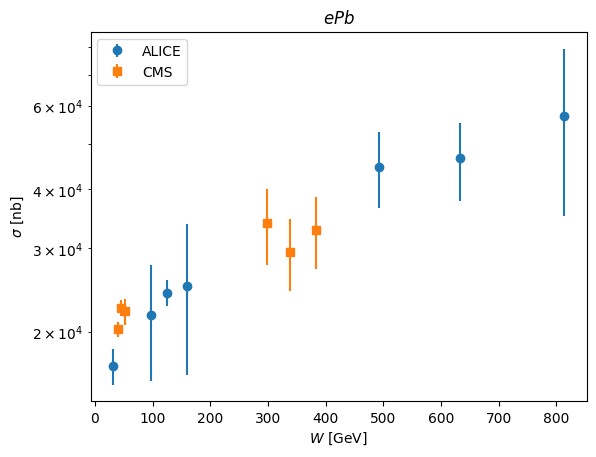

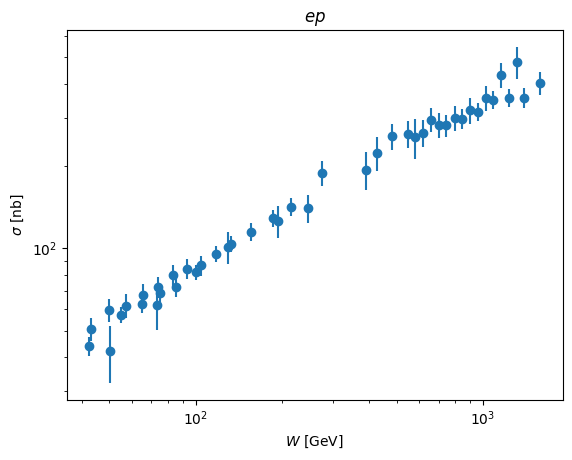

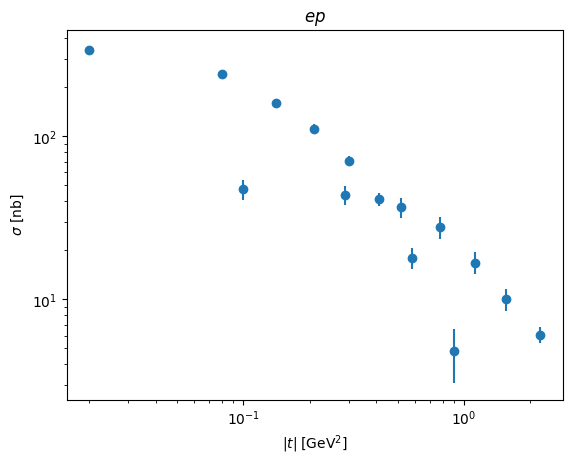

In [2]:
# plot sigma(ePb)_ALICE
fig, ax = plt.subplots()
ax.errorbar(W_ePb_ALICE, sigma_ePb_ALICE, yerr=sigma_err_ePb_ALICE, fmt='o', label='ALICE')
ax.errorbar(W_ePb_CMS, sigma_ePb_CMS, yerr=sigma_err_ePb_CMS, fmt='s', label='CMS')
ax.set_xlabel(r'$W$ [GeV]')
ax.set_ylabel(r'$\sigma$ [nb]')
ax.set_title(r'$ePb$')
ax.set_yscale('log')
plt.legend(loc='upper left')
plt.show()

# plot sigma(ep)
fig, ax = plt.subplots()
ax.errorbar(W_ep, sigma_ep, yerr=sigma_err_ep, fmt='o')
ax.set_xlabel(r'$W$ [GeV]')
ax.set_ylabel(r'$\sigma$ [nb]')
ax.set_title(r'$ep$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

# plot sigma(ep_tdiff)
fig, ax = plt.subplots()
ax.errorbar(t_ep_tdiff, sigma_ep_tdiff, yerr=sigma_err_ep_tdiff, fmt='o')
ax.set_xlabel(r'$|t|\; [\mathrm{GeV}^2]$')
ax.set_ylabel(r'$\sigma$ [nb]')
ax.set_title(r'$ep$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


In [4]:
from src.mcmc import Chain
import pickle
from os import path

def read_pkl_file_chain(PATH_pklfile_chains):
    with open(PATH_pklfile_chains, 'rb') as pf:
        data = pickle.load(pf)
    return data['chain']

chain_PCSK_pkl = read_pkl_file_chain(path.join("../mcmc_PCSK_sep_emu_no_expcov/", "chain.pkl"))
chain_PCSK = np.nan_to_num(chain_PCSK_pkl)

chain_PCSK_cov_pkl = read_pkl_file_chain(path.join("../mcmc_PCSK_sep_emu_full_expcov/", "chain.pkl"))
chain_PCSK_cov = np.nan_to_num(chain_PCSK_cov_pkl)

# define the relevant mcmc object
exp_path = "../exp_data_JIMWLK.pkl"
model_par = "../IP_DIFF_JIMWLK_prior_range_delete_unused"
mymcmc = Chain(expdata_path=exp_path, model_parafile=model_par)

folder = "../"
emuPathList = [folder+"emulator_set1.pkl",folder+"emulator_set2.pkl",folder+"emulator_set3.pkl"]
mymcmc.loadEmulator(emuPathList)

# setup the MCMC Chain
rng = np.random.default_rng()
sampleIdxList = rng.choice(chain_PCSK.shape[0], 50, replace=False)
posteriorSamples = chain_PCSK[sampleIdxList, :]

postPred_PCSK = mymcmc._predict(posteriorSamples)
postPred_PCSK = postPred_PCSK[0].transpose()
nsamples_PCSK = postPred_PCSK.shape[1]

sampleIdxList = rng.choice(chain_PCSK_cov.shape[0], 50, replace=False)
posteriorSamples = chain_PCSK_cov[sampleIdxList, :]
postPred_PCSK_cov = mymcmc._predict(posteriorSamples)
postPred_PCSK_cov = postPred_PCSK_cov[0].transpose()
nsamples_PCSK_cov = postPred_PCSK_cov.shape[1]

[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/chain.pkl
[INFO][mcmc] Loading the model parameters space from ../IP_DIFF_JIMWLK_prior_range_delete_unused ...
[INFO][mcmc] Run MCMC with emcee...
[INFO][mcmc] Loading the experiment data from ../exp_data_JIMWLK.pkl ...
[INFO][mcmc] Experimental dataset size: 73
[INFO][mcmc] Number of Emulators: 3


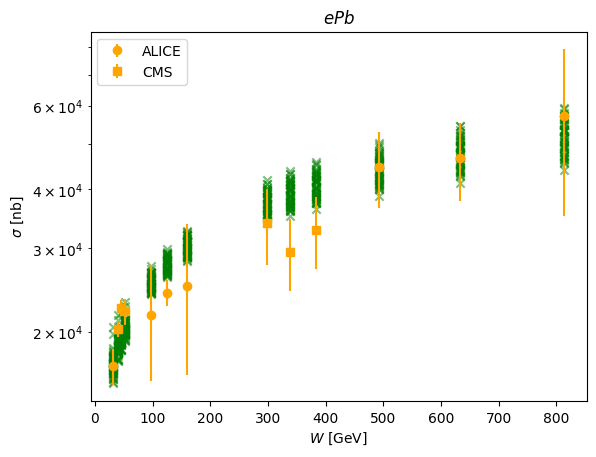

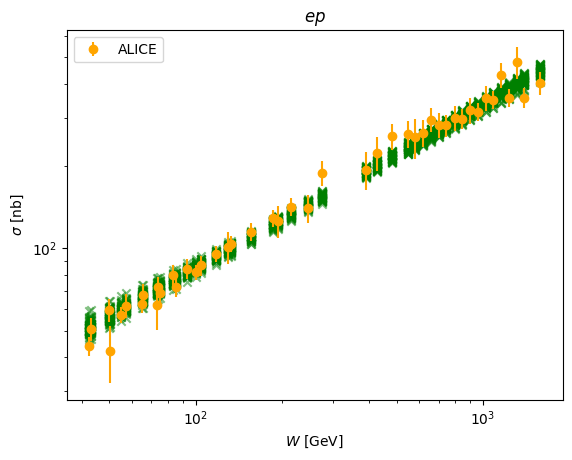

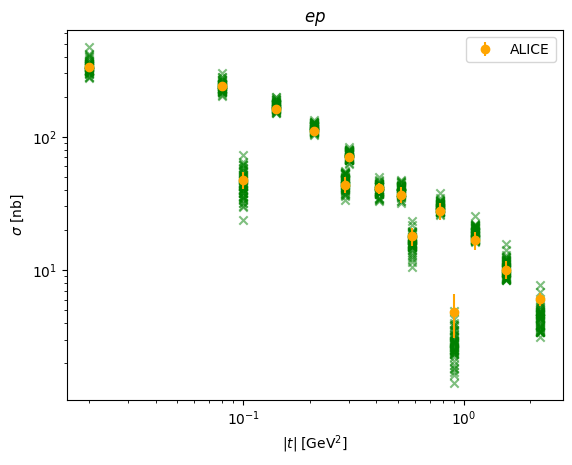

In [5]:
# plot the experimental data with the emulator prediction
fig, ax = plt.subplots()
ax.errorbar(W_ePb_ALICE, sigma_ePb_ALICE, yerr=sigma_err_ePb_ALICE, fmt='o', label='ALICE', color='orange')
ax.errorbar(W_ePb_CMS, sigma_ePb_CMS, yerr=sigma_err_ePb_CMS, fmt='s', label='CMS', color='orange')

W_PCSK = np.concatenate((W_ePb_ALICE, W_ePb_CMS))
for i in range(nsamples_PCSK):
    tmp = list(np.exp(postPred_PCSK[:13,i]))
    ax.scatter(W_PCSK, tmp, color='g', alpha=0.5, marker='x')

ax.set_xlabel(r'$W$ [GeV]')
ax.set_ylabel(r'$\sigma$ [nb]')
ax.set_title(r'$ePb$')
ax.set_yscale('log')
plt.legend(loc='upper left')
plt.show()

# plot the experimental data with the emulator prediction
fig, ax = plt.subplots()
ax.errorbar(W_ep, sigma_ep, yerr=sigma_err_ep, fmt='o', color='orange', label='ALICE')

for i in range(nsamples_PCSK):
    tmp = list(np.exp(postPred_PCSK[13:58,i]))
    #print(tmp.shape)
    ax.scatter(W_ep, tmp, color='g', alpha=0.5, marker='x')

ax.set_xlabel(r'$W$ [GeV]')
ax.set_ylabel(r'$\sigma$ [nb]')
ax.set_title(r'$ep$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='upper left')
plt.show()

# plot the experimental data with the emulator prediction
fig, ax = plt.subplots()
ax.errorbar(t_ep_tdiff, sigma_ep_tdiff, yerr=sigma_err_ep_tdiff, fmt='o', color='orange', label='ALICE')

for i in range(nsamples_PCSK):
    tmp = list(np.exp(postPred_PCSK[58:,i]))
    ax.scatter(t_ep_tdiff, tmp, color='g', alpha=0.5, marker='x')

ax.set_xlabel(r'$|t|\; [\mathrm{GeV}^2]$')
ax.set_ylabel(r'$\sigma$ [nb]')
ax.set_title(r'$ep$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='upper right')
plt.show()

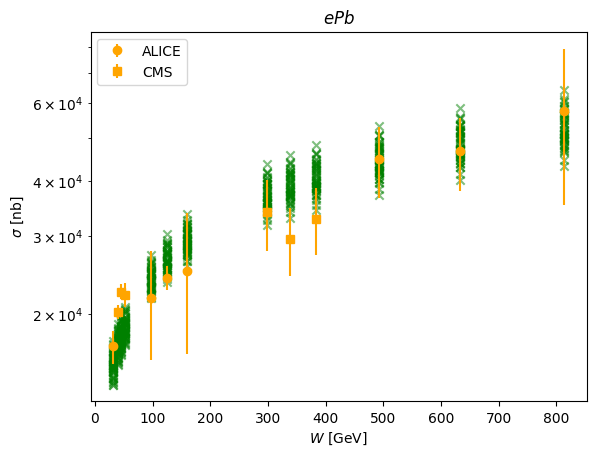

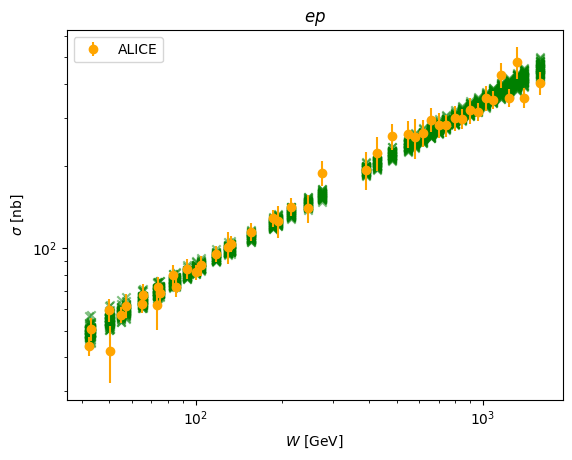

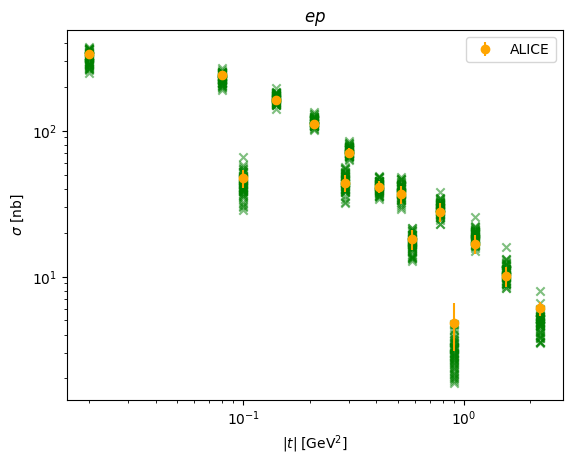

In [6]:
# plot the experimental data with the emulator prediction
fig, ax = plt.subplots()
ax.errorbar(W_ePb_ALICE, sigma_ePb_ALICE, yerr=sigma_err_ePb_ALICE, fmt='o', label='ALICE', color='orange')
ax.errorbar(W_ePb_CMS, sigma_ePb_CMS, yerr=sigma_err_ePb_CMS, fmt='s', label='CMS', color='orange')

W_PCSK = np.concatenate((W_ePb_ALICE, W_ePb_CMS))
for i in range(nsamples_PCSK_cov):
    tmp = list(np.exp(postPred_PCSK_cov[:13,i]))
    ax.scatter(W_PCSK, tmp, color='g', alpha=0.5, marker='x')

ax.set_xlabel(r'$W$ [GeV]')
ax.set_ylabel(r'$\sigma$ [nb]')
ax.set_title(r'$ePb$')
ax.set_yscale('log')
plt.legend(loc='upper left')
plt.show()

# plot the experimental data with the emulator prediction
fig, ax = plt.subplots()
ax.errorbar(W_ep, sigma_ep, yerr=sigma_err_ep, fmt='o', color='orange', label='ALICE')

for i in range(nsamples_PCSK_cov):
    tmp = list(np.exp(postPred_PCSK_cov[13:58,i]))
    #print(tmp.shape)
    ax.scatter(W_ep, tmp, color='g', alpha=0.5, marker='x')

ax.set_xlabel(r'$W$ [GeV]')
ax.set_ylabel(r'$\sigma$ [nb]')
ax.set_title(r'$ep$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='upper left')
plt.show()

# plot the experimental data with the emulator prediction
fig, ax = plt.subplots()
ax.errorbar(t_ep_tdiff, sigma_ep_tdiff, yerr=sigma_err_ep_tdiff, fmt='o', color='orange', label='ALICE')

for i in range(nsamples_PCSK_cov):
    tmp = list(np.exp(postPred_PCSK_cov[58:,i]))
    ax.scatter(t_ep_tdiff, tmp, color='g', alpha=0.5, marker='x')

ax.set_xlabel(r'$|t|\; [\mathrm{GeV}^2]$')
ax.set_ylabel(r'$\sigma$ [nb]')
ax.set_title(r'$ep$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='upper right')
plt.show()